In [106]:
import os
# set up the working directory
os.chdir('/Users/deborah_j/Documents/CEU/datacamp-playground/Introduction_to_Statistics_in_Python/')

# Dates and Calendars

In [107]:
# Create Dates: in date() function zero padding is NOT required
from datetime import date
two_hurrican_dates = [date(2016, 10,7),date(2017, 6,21)]

In [108]:
# attributes of the date object
print(two_hurrican_dates[0].year)   
print(two_hurrican_dates[0].month) 
print(two_hurrican_dates[0].day) 

2016
10
7


In [109]:
# Find the weekday of a date
print(two_hurrican_dates[1].weekday())

2


In [110]:
# Match with dates
from datetime import timedelta
td =timedelta(days = 31, hours = 1)
print(td.total_seconds())
print(two_hurrican_dates[0] + td)

2682000.0
2016-11-07


In [111]:
# incrementing variables with += or -=
x =0
x += 1
print(x)

y =10
y -= 1
print(y)


1
9


In [112]:
# turn dates into strings
from datetime import date
d1 = date(1994,2,11)
print(d1)    
# ISO 8601 format in a list
print([d1.isoformat()])   


1994-02-11
['1994-02-11']


In [113]:
# strftime() method: more flexible way to format dates
d2 = date(1997,10,8)
print(d2.strftime("%A, %B %d, %Y"))

# it works with more text wrapped as well!
print(d2.strftime("Year is %Y"))

# Format: YYYY/MM/DD
print(d2.strftime("%Y/%m/%d"))

Wednesday, October 08, 1997
Year is 1997
1997/10/08


In [114]:
# A few dates that computers once had trouble with
some_dates = ['1999-12-11', '1999-11-12']
# Print them in order from earliest to latest
print(sorted(some_dates))

['1999-11-12', '1999-12-11']


# Combining Dates and Times

In [115]:
from datetime import datetime
dt = datetime(1994, 2, 11, 1, 51, 59) #follow the vibe and type!
print(dt)

1994-02-11 01:51:59


In [116]:
# replace part of a datetime
dt_update = dt.replace(minute = 58, second = 8)
print(dt_update)

1994-02-11 01:58:08


In [117]:
# strftime can deal with time as well
print(dt.strftime("%H:%M:%S on %Y-%m-%d"))

01:51:59 on 1994-02-11


In [118]:
# ISO 8601 format
print(dt.isoformat())

1994-02-11T01:51:59


In [119]:
# Parsing datetimes with strptime
from datetime import datetime
dt2 = datetime.strptime("12/31/2017 15:32:31", "%m/%d/%Y %H:%M:%S") #it takes two arguments that must tally
print(dt2)

2017-12-31 15:32:31


In [120]:
# or we can use timestamp tp parse a date
ts = 1514673151.0
print(datetime.fromtimestamp(ts))

2017-12-30 23:32:31


# Time zones and Daylight Saving

In [121]:
from datetime import datetime, timedelta, timezone
# Create a timezone for Eastern Standard Time (EST)
ET = timezone(timedelta(hours = -5)) # 5 hours behind UTC
#  timezone-aware datetime
dt3 = datetime(2020, 2,14, 15,8,3, tzinfo= ET)
print(dt3) 

2020-02-14 15:08:03-05:00


In [122]:
# Indian time: a special case where the timezone is not a whole number of hours
IST = timezone(timedelta(hours = 5, minutes = 30))
print(dt3.astimezone(IST))

2020-02-15 01:38:03+05:30


In [ ]:
# Adjusting timezone vs changing tzinfo
print(dt3)
print(dt3.replace(tzinfo = timezone.utc))
# the replace() method is not the best way to change the timezone of a datetime object.
# The best way is to use the astimezone() method, by changing original to match UTC
print(dt3.astimezone(timezone.utc))
# Use the .replace() method to change the hourzone of a datetime, leaving the date and
# time the same.
# use the .astimezone() method to shift the date and time to match the new timezone.

2020-02-14 15:08:03-05:00
2020-02-14 15:08:03+00:00
2020-02-14 20:08:03+00:00


In [124]:
# time zone database
from datetime import datetime
from dateutil import tz
# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')
print(et) #we can use this et as tine zone info

tzfile('/usr/share/zoneinfo/America/New_York')


In [125]:
last = datetime(2020, 2, 14, 15, 8, 3, tzinfo = et)
print(last)

2020-02-14 15:08:03-05:00


# Dates and Times in Pandas: a case study with bike rides

In [126]:
import pandas as pd
os.chdir('/Users/deborah_j/Documents/CEU/datacamp-playground/Working_with_Dates_and_Times_in_Python/')
# parse_dates argument to read_csv() to convert date columns from strings (text) into datetime objects automatically 
rides = pd.read_csv('capital-onebike.csv', parse_dates = ['Start date', 'End date'])
print(rides.head(2))

           Start date            End date  Start station number  \
0 2017-10-01 15:23:25 2017-10-01 15:26:26                 31038   
1 2017-10-01 15:42:57 2017-10-01 17:49:59                 31036   

                   Start station  End station number  \
0           Glebe Rd & 11th St N               31036   
1  George Mason Dr & Wilson Blvd               31036   

                     End station Bike number Member type  
0  George Mason Dr & Wilson Blvd      W20529      Member  
1  George Mason Dr & Wilson Blvd      W20529      Casual  


In [127]:
# alternative method: convert the Start date column from strings to datetime
# rides['Start date'] = pd.to_datetime(rides['Start date'], format = "%Y-%m-%d %H:%M:%S")
# rides['End date'] = pd.to_datetime(rides['End date'], format = "%Y-%m-%d %H:%M:%S")

In [128]:
# create a duration column
rides['Duration'] = rides['End date'] - rides['Start date']
print(rides['Duration'].head(2))

0   0 days 00:03:01
1   0 days 02:07:02
Name: Duration, dtype: timedelta64[ns]


In [129]:
# back slash as a line continuation character, 
# allowing you to split a single logical statement across multiple lines for better readability.
rides['Duration']\
.dt.total_seconds()\
.head(2)

0     181.0
1    7622.0
Name: Duration, dtype: float64

In [137]:
# percent of time out of the dock in months
rides['Duration'].sum()/timedelta(days = 91)

0.04348417785917786

In [140]:
# count how many time the bike started at each station
rides['Member type'].value_counts()

Member    236
Casual     54
Name: Member type, dtype: int64

In [143]:
# percent of rides by member
rides['Member type'].value_counts(normalize = True)
# rides['Member type'].value_counts()/len(rides) #alternatively

Member    0.813793
Casual    0.186207
Name: Member type, dtype: float64

In [150]:
# average duration per member type
rides['Duration minutes'] = rides['Duration'].dt.total_seconds()/60
rides.groupby('Member type')['Duration minutes'].mean().round(2)

Member type
Casual    33.24
Member    16.54
Name: Duration minutes, dtype: float64

In [155]:
# average dutation by month
rides.resample('M', on = 'Start date')['Duration minutes'].mean().round(2)
# resample() method is a time-based groupby, followed by a reduction method like mean(), sum(), etc.

Start date
2017-10-31    31.44
2017-11-30    14.24
2017-12-31    10.59
Freq: M, Name: Duration minutes, dtype: float64

In [157]:
# size per group
rides.groupby('Member type').size()

Member type
Casual     54
Member    236
dtype: int64

In [159]:
# first ride per group: The first() method returns the first n rows, based on the specified value.
rides.groupby('Member type').first()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Duration,Duration seconds,Duration minutes
Member type,,,,,,,,,,
Casual,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,0 days 02:07:02,7622.0,127.033333
Member,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,0 days 00:03:01,181.0,3.016667


<AxesSubplot:xlabel='Start date'>

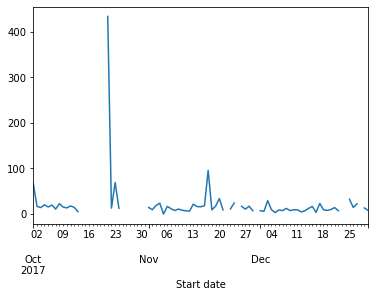

In [173]:
# visualizing start dates of rides
rides\
.resample('D', on = 'Start date')\
['Duration minutes']\
.mean()\
.plot()

In [ ]:
# why it's negative? - diffferent hour zones!
rides['Duration'].dt.total_seconds().min()

-3346.0

In [176]:
# try to set a timezone but got an error: need to use the 'ambigugous' argument
# # rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York')
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous = 'NaT')
rides['End date'] = rides['End date'].dt.tz_localize('America/New_York', ambiguous = 'NaT')


In [187]:
# recalculate the duration  
rides['Duration'] = rides['End date'] - rides['Start date']
# Find the minimum again
rides['Duration'].dt.total_seconds().min().__round__(2)

116.0

In [193]:
#  month of the first three rides
rides['Start date']\
    .head(3)\
    .dt.month

0    10
1    10
2    10
Name: Start date, dtype: int64

In [ ]:
# weekdays of the first three rides
rides['Start date']\
    .head(3)\
    .dt.day_name

0    Sunday
1    Sunday
2    Monday
Name: Start date, dtype: object

In [ ]:
# shift the indexes forward one, padding with NaT
rides['End date'].shift(1).head(3)

0                         NaT
1   2017-10-01 15:26:26-04:00
2   2017-10-01 17:49:59-04:00
Name: End date, dtype: datetime64[ns, America/New_York]